In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [2]:
IMOEX = pd.read_csv('IMOEX.csv', index_col='date')
BRENT = pd.read_csv('BRENT.csv', index_col='date')
SNP500 = pd.read_csv('SNP500.csv', index_col='date')
GOLD = pd.read_csv('GOLD.csv', index_col='date')
USDRUB = pd.read_csv('USDRUB.csv', index_col='date')
EURRUB = pd.read_csv('EURRUB.csv', index_col='date')

In [3]:
IMOEX.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,year,month,day
date,,,,,,,,
1998-01-06,88.97,88.97,88.97,88.97,0,1998,1,6
1998-01-08,83.56,83.56,83.56,83.56,0,1998,1,8
1998-01-09,81.26,81.26,81.26,81.26,0,1998,1,9
1998-01-12,70.61,70.61,70.61,70.61,0,1998,1,12
1998-01-13,73.34,73.34,73.34,73.34,0,1998,1,13


In [4]:
IMOEX.drop('year',axis=1, inplace=True)
IMOEX['delta_lh'] = IMOEX['<HIGH>'] - IMOEX['<LOW>']
IMOEX['delta_oc'] = abs(IMOEX['<OPEN>'] - IMOEX['<CLOSE>'])
IMOEX['EMA10'] = IMOEX['<CLOSE>'].rolling(10, center=True).mean()
IMOEX['EMA30'] = IMOEX['<CLOSE>'].rolling(30, center=True).mean()
IMOEX['EMA90'] = IMOEX['<CLOSE>'].rolling(90, center=True).mean()
IMOEX['EMA150'] = IMOEX['<CLOSE>'].rolling(150, center=True).mean()

In [34]:
IMOEX['target_per'] = (IMOEX['<CLOSE>'].shift(-5) - IMOEX['<CLOSE>']) / IMOEX['<CLOSE>'] * 100


In [35]:
target_m = list()
for per in IMOEX['target_per']:
    if per<=-10.:
        target_m.append(0)
    elif per<= -5.:
        target_m.append(1)
    elif per<= 0.:
        target_m.append(2)
    elif per<= 5.:
        target_m.append(3)
    elif per<= 10.:
        target_m.append(4)
    else:
        target_m.append(5)
target_m[:10]        

[0, 0, 0, 3, 2, 2, 2, 1, 0, 0]

In [36]:
IMOEX['target_class'] = pd.Series(target_m, index=IMOEX.index)

In [37]:
IMOEX.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,month,day,delta_lh,delta_oc,EMA10,EMA30,EMA90,EMA150,target_per,target_class
date,,,,,,,,,,,,,,,
1998-01-06,88.97,88.97,88.97,88.97,0,1,6,0.0,0.0,NaN,NaN,NaN,NaN,-16.646060,0
1998-01-08,83.56,83.56,83.56,83.56,0,1,8,0.0,0.0,NaN,NaN,NaN,NaN,-15.485878,0
1998-01-09,81.26,81.26,81.26,81.26,0,1,9,0.0,0.0,NaN,NaN,NaN,NaN,-13.106079,0
1998-01-12,70.61,70.61,70.61,70.61,0,1,12,0.0,0.0,NaN,NaN,NaN,NaN,3.951282,3
1998-01-13,73.34,73.34,73.34,73.34,0,1,13,0.0,0.0,NaN,NaN,NaN,NaN,-0.013635,2


In [38]:
data = IMOEX.drop(['<OPEN>','<HIGH>','<LOW>'], axis=1)
data.head()

,<CLOSE>,<VOL>,month,day,delta_lh,delta_oc,EMA10,EMA30,EMA90,EMA150,target_per,target_class
date,,,,,,,,,,,,
1998-01-06,88.97,0,1,6,0.0,0.0,NaN,NaN,NaN,NaN,-16.646060,0
1998-01-08,83.56,0,1,8,0.0,0.0,NaN,NaN,NaN,NaN,-15.485878,0
1998-01-09,81.26,0,1,9,0.0,0.0,NaN,NaN,NaN,NaN,-13.106079,0
1998-01-12,70.61,0,1,12,0.0,0.0,NaN,NaN,NaN,NaN,3.951282,3
1998-01-13,73.34,0,1,13,0.0,0.0,NaN,NaN,NaN,NaN,-0.013635,2


In [39]:
data_2 = pd.merge(data, BRENT['<CLOSE>'], left_index=True, right_index=True,suffixes=["_IM", "_BRENT"])

In [40]:
data_3 = pd.merge(data_2, SNP500['<CLOSE>'], left_index=True, right_index=True)
data_3.head()

,<CLOSE>_IM,<VOL>,month,day,delta_lh,delta_oc,EMA10,EMA30,EMA90,EMA150,target_per,target_class,<CLOSE>_BRENT,<CLOSE>
date,,,,,,,,,,,,,,
2001-02-16,183.51,0,2,16,0.0,0.0,170.894,167.016333,162.680000,171.281067,-12.560623,0,26.56,1301.53
2001-02-19,173.96,0,2,19,0.0,0.0,170.303,166.738333,162.783778,171.402867,-6.599218,1,26.75,1301.53
2001-02-20,172.35,0,2,20,0.0,0.0,169.905,166.630333,162.909222,171.543800,-6.347549,1,26.07,1278.94
2001-02-21,159.03,0,2,21,0.0,0.0,168.916,166.515333,163.009111,171.698067,-0.584795,2,25.84,1255.27
2001-02-22,161.17,0,2,22,0.0,0.0,167.311,166.403667,163.254444,171.850667,-3.567661,2,25.94,1252.82


In [41]:
data_4 = pd.merge(data_3, GOLD['<CLOSE>'], left_index=True, right_index=True, suffixes=["_SNP500", "_GOLD"])
data_4.head()

,<CLOSE>_IM,<VOL>,month,day,delta_lh,delta_oc,EMA10,EMA30,EMA90,EMA150,target_per,target_class,<CLOSE>_BRENT,<CLOSE>_SNP500,<CLOSE>_GOLD
date,,,,,,,,,,,,,,,
2001-02-16,183.51,0,2,16,0.0,0.0,170.894,167.016333,162.680000,171.281067,-12.560623,0,26.56,1301.53,258.2
2001-02-19,173.96,0,2,19,0.0,0.0,170.303,166.738333,162.783778,171.402867,-6.599218,1,26.75,1301.53,258.2
2001-02-20,172.35,0,2,20,0.0,0.0,169.905,166.630333,162.909222,171.543800,-6.347549,1,26.07,1278.94,256.1
2001-02-21,159.03,0,2,21,0.0,0.0,168.916,166.515333,163.009111,171.698067,-0.584795,2,25.84,1255.27,258.2
2001-02-22,161.17,0,2,22,0.0,0.0,167.311,166.403667,163.254444,171.850667,-3.567661,2,25.94,1252.82,258.5


In [42]:
data_5 = pd.merge(data_4, USDRUB['<CLOSE>'], left_index=True, right_index=True)
data_5.head()

,<CLOSE>_IM,<VOL>,month,day,delta_lh,delta_oc,EMA10,EMA30,EMA90,EMA150,target_per,target_class,<CLOSE>_BRENT,<CLOSE>_SNP500,<CLOSE>_GOLD,<CLOSE>
date,,,,,,,,,,,,,,,,
2001-02-16,183.51,0,2,16,0.0,0.0,170.894,167.016333,162.680000,171.281067,-12.560623,0,26.56,1301.53,258.2,28.43
2001-02-19,173.96,0,2,19,0.0,0.0,170.303,166.738333,162.783778,171.402867,-6.599218,1,26.75,1301.53,258.2,28.70
2001-02-20,172.35,0,2,20,0.0,0.0,169.905,166.630333,162.909222,171.543800,-6.347549,1,26.07,1278.94,256.1,28.45
2001-02-21,159.03,0,2,21,0.0,0.0,168.916,166.515333,163.009111,171.698067,-0.584795,2,25.84,1255.27,258.2,28.44
2001-02-22,161.17,0,2,22,0.0,0.0,167.311,166.403667,163.254444,171.850667,-3.567661,2,25.94,1252.82,258.5,28.44


In [43]:
data_6 = pd.merge(data_5, EURRUB['<CLOSE>'], left_index=True, right_index=True, suffixes=["_USDRUB", "_EURRUB"])
data_6.head()

,<CLOSE>_IM,<VOL>,month,day,delta_lh,delta_oc,EMA10,EMA30,EMA90,EMA150,target_per,target_class,<CLOSE>_BRENT,<CLOSE>_SNP500,<CLOSE>_GOLD,<CLOSE>_USDRUB,<CLOSE>_EURRUB
date,,,,,,,,,,,,,,,,,
2001-02-16,183.51,0,2,16,0.0,0.0,170.894,167.016333,162.680000,171.281067,-12.560623,0,26.56,1301.53,258.2,28.43,26.2777
2001-02-19,173.96,0,2,19,0.0,0.0,170.303,166.738333,162.783778,171.402867,-6.599218,1,26.75,1301.53,258.2,28.70,26.2900
2001-02-20,172.35,0,2,20,0.0,0.0,169.905,166.630333,162.909222,171.543800,-6.347549,1,26.07,1278.94,256.1,28.45,26.0943
2001-02-21,159.03,0,2,21,0.0,0.0,168.916,166.515333,163.009111,171.698067,-0.584795,2,25.84,1255.27,258.2,28.44,25.9110
2001-02-22,161.17,0,2,22,0.0,0.0,167.311,166.403667,163.254444,171.850667,-3.567661,2,25.94,1252.82,258.5,28.44,25.9963


In [44]:
data_6.columns

Index([u'<CLOSE>_IM', u'<VOL>', u'month', u'day', u'delta_lh', u'delta_oc',
       u'EMA10', u'EMA30', u'EMA90', u'EMA150', u'target_per', u'target_class',
       u'<CLOSE>_BRENT', u'<CLOSE>_SNP500', u'<CLOSE>_GOLD', u'<CLOSE>_USDRUB',
       u'<CLOSE>_EURRUB'],
      dtype='object')

In [45]:
data = data_6
data.columns = [u'IMOEX', u'VOL', u'month', u'day', u'delta_lh', u'delta_oc',
       u'EMA10', u'EMA30', u'EMA90', u'EMA150', u'target_per', u'target_class',
       u'BRENT', u'SNP500', u'GOLD', u'USDRUB',
       u'EURRUB']

In [46]:
data.to_csv('data_imoex_5')

In [47]:
data = pd.read_csv('data_imoex_5',index_col='date')

In [48]:
data.corr()

,IMOEX,VOL,month,day,delta_lh,delta_oc,EMA10,EMA30,EMA90,EMA150,target_per,target_class,BRENT,SNP500,GOLD,USDRUB,EURRUB
IMOEX,1.000000,0.610063,-0.021661,-0.011683,0.346987,0.220574,0.999573,0.998776,0.996537,0.994094,-0.089939,-0.076701,0.432148,0.845106,0.747792,0.668218,0.773504
VOL,0.610063,1.000000,-0.056719,-0.035400,0.676223,0.470149,0.608941,0.606264,0.595254,0.591329,-0.073601,-0.051176,0.538132,0.257002,0.548220,0.112461,0.273822
month,-0.021661,-0.056719,1.000000,-0.031674,-0.040404,-0.035472,-0.019454,-0.012024,0.020069,0.005950,0.009154,0.001030,-0.004100,-0.013581,-0.011780,-0.010555,-0.005157
day,-0.011683,-0.035400,-0.031674,1.000000,-0.041195,-0.022584,-0.007287,-0.006074,-0.004769,-0.006656,0.068125,0.038349,-0.002314,-0.007763,-0.011428,-0.013819,-0.014071
delta_lh,0.346987,0.676223,-0.040404,-0.041195,1.000000,0.810704,0.350746,0.349450,0.351638,0.360818,-0.069066,-0.050602,0.336984,0.126386,0.301190,0.074846,0.193266
delta_oc,0.220574,0.470149,-0.035472,-0.022584,0.810704,1.000000,0.223636,0.221012,0.223088,0.231303,-0.036611,-0.029255,0.227357,0.064003,0.185782,0.028130,0.108795
EMA10,0.999573,0.608941,-0.019454,-0.007287,0.350746,0.223636,1.000000,0.999450,0.997318,0.994918,-0.077199,-0.070431,0.434337,0.844657,0.747888,0.667575,0.773339
EMA30,0.998776,0.606264,-0.012024,-0.006074,0.349450,0.221012,0.999450,1.000000,0.998554,0.996304,-0.059369,-0.053865,0.437920,0.843206,0.747781,0.666586,0.773806
EMA90,0.996537,0.595254,0.020069,-0.004769,0.351638,0.223088,0.997318,0.998554,1.000000,0.998989,-0.056259,-0.049937,0.446549,0.837747,0.748728,0.664366,0.776066
EMA150,0.994094,0.591329,0.005950,-0.006656,0.360818,0.231303,0.994918,0.996304,0.998989,1.000000,-0.058515,-0.052580,0.450294,0.833332,0.751225,0.662272,0.777892


In [49]:
X = data.dropna().drop(['target_per','target_class'], axis=1)
y = data.dropna()['target_class']

In [50]:
y.unique()

array([0, 1, 2, 4, 5, 3], dtype=int64)

In [51]:
print y[y==0].count()
print y[y==1].count()
print y[y==2].count()
print y[y==3].count()
print y[y==4].count()
print y[y==5].count()

68
246
1648
2163
334
64


In [52]:
print X.shape
print y.shape

(4523, 15)
(4523L,)


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, shuffle = True, random_state=0)
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [54]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.57      0.73      0.64        11
           1       0.27      0.60      0.37        25
           2       0.65      0.68      0.66       386
           3       0.82      0.68      0.74       664
           4       0.23      0.59      0.33        37
           5       0.35      0.75      0.48         8

   micro avg       0.67      0.67      0.67      1131
   macro avg       0.48      0.67      0.54      1131
weighted avg       0.72      0.67      0.69      1131



Text(0.5,12.5,'predicted label')

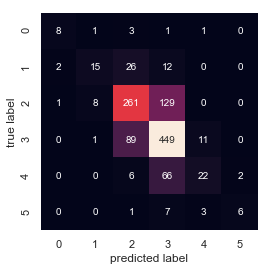

In [55]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ypred, ytest)
seaborn.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label')

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle
model_2 = RandomForestClassifier(n_estimators=1000)
X_sh, y_sh = shuffle(X, y, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(model_2, X_sh, y_sh, train_sizes=np.arange(0.1,1,0.2),cv=3,scoring='accuracy')

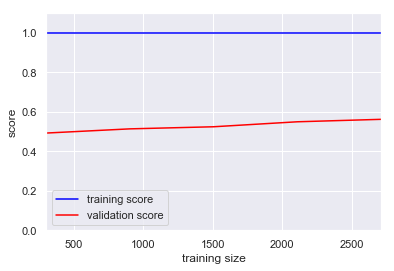

In [28]:
plt.plot(train_sizes, np.mean(train_scores, 1), color='blue', label='training score')
plt.plot(train_sizes, np.mean(test_scores, 1), color='red', label='validation score')
plt.ylim(0, 1.1)
plt.xlim(train_sizes[0], train_sizes[-1])
plt.xlabel('training size') # Размерность обучения
plt.ylabel('score')
plt.legend(loc='best')

In [29]:
metrics.accuracy_score(ypred, ytest)

0.5923961096374889

In [30]:
#Применяем модель ко всем данным
ypred_all = model.predict(X)

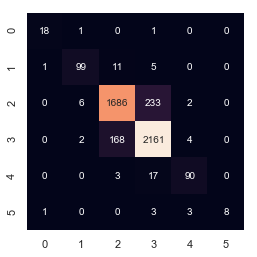

In [31]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ypred_all, y)
seaborn.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

In [32]:
metrics.accuracy_score(y, ypred_all)

0.8980764978996242

In [37]:
target = np.array(y == ypred_all)
target = target.astype(int)

In [13]:
ypred_all_df = pd.DataFrame(ypred_all, index=y.index)

None


In [31]:
print (X.columns)
print(model.feature_importances_)

Index([u'IMOEX', u'VOL', u'month', u'day', u'delta_lh', u'delta_oc', u'EMA10',
       u'EMA30', u'EMA90', u'EMA150', u'BRENT', u'SNP500', u'GOLD', u'USDRUB',
       u'EURRUB'],
      dtype='object')
[0.09381896 0.03551892 0.04938909 0.03861182 0.03310272 0.02719693
 0.08460153 0.07315407 0.08578331 0.0926695  0.08485994 0.07008627
 0.07129325 0.0863105  0.07360317]


In [33]:
print model.predict_proba(Xtest)[:7]
print Xtest[:7].index

[[0.002 0.031 0.531 0.434 0.002 0.   ]
 [0.015 0.138 0.215 0.553 0.019 0.06 ]
 [0.    0.    0.446 0.554 0.    0.   ]
 [0.    0.    0.662 0.337 0.001 0.   ]
 [0.015 0.04  0.324 0.436 0.178 0.007]
 [0.008 0.138 0.161 0.651 0.04  0.002]
 [0.    0.005 0.182 0.813 0.    0.   ]]
Index([u'2011-01-24', u'2009-02-06', u'2018-09-28', u'2015-08-27',
       u'2009-07-15', u'2008-12-11', u'2001-06-14'],
      dtype='object', name=u'date')
